In [1]:
"""\
# Copyright (C) 2023 Jesús Bautista Villar <jesbauti20@gmail.com>
- Testing a proportional 3D heading control algorithm -
"""

import os
import numpy as np

# -- Graphic tools --
import matplotlib

matplotlib.rc('font', **{'size' : 14})
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

import matplotlib.pyplot as plt

# -- Our utils --
from simulations.utils.tools_math import *
from simulations.utils.tools_plot import *

from simulations.utils.tools_basic import createDir

from simulations.sim_thm1 import sim_thm1
from simulations.sim_thm2 import sim_thm2
from simulations.sim_prop2 import sim_prop2
from simulations.sim_ss_test import sim_ss_test


# Create the output directory
OUTPUT_FOLDER = os.path.join("output")
createDir(OUTPUT_FOLDER)

The directory 'output' already exists!


## Some tests in $\mathrm{SO}(3)$

In [2]:
from simulations.utils.tools_math import rot_3d_matrix, so3_hat, so3_vee, theta_distance_from_R, exp_map, log_map_of_R

In [ ]:
# YAW
psi = -np.pi/5
# PITCH
theta = np.pi/5
# ROLL
phi = 0
R = rot_3d_matrix(psi, theta, phi)

# ----
W = log_map_of_R(R)
omega = so3_vee(W)

mu_Re = np.sqrt(omega[0]**2 + omega[1]**2 + omega[2]**2) # Ra = I

mu_Re = theta_distance_from_R(R)
# ----
x = np.array([[1,0,0]]).T # = m_d

delta = np.squeeze(np.arccos(x.T @ R @ x))
delta_ang = np.arccos(np.cos(psi)*np.cos(theta))
# ----

print(R)
print(omega)

print("\ndelta:", delta)
print("delta_ang:", delta_ang)
print("sum yaw-pith:", abs(psi) + abs(theta))

print("\nmu:", mu_Re)
print("sum anges:", abs(psi) + abs(theta) + abs(phi))

In [ ]:
R1 = rot_3d_matrix(psi, 0, 0)
R2 = rot_3d_matrix(psi, theta, phi)

fig  = plt.figure(figsize=(12,12))
grid = plt.GridSpec(1, 2, hspace=0, wspace=0.2)

ax1 = fig.add_subplot(grid[:, 0], projection='3d')
ax2 = fig.add_subplot(grid[:, 1], projection='3d')

# Plotting the 3D heading trajectory
plot_heading_traj(R1, ax=ax1, lim=1.6)
plot_heading_traj(R2, ax=ax2, lim=1.6)

In [5]:
w = np.array([0,0,1])
w_hat = so3_hat(w)

print(np.sqrt(np.trace(w_hat.T @ w_hat)))
print(np.sqrt(np.dot(w,w)))
print(np.sqrt(2*np.dot(w,w)))

1.4142135623730951
1.0
1.4142135623730951


## Theorem 1 (tech note) numerical verification

100%|██████████| 1201/1201 [00:00<00:00, 3139.91it/s]


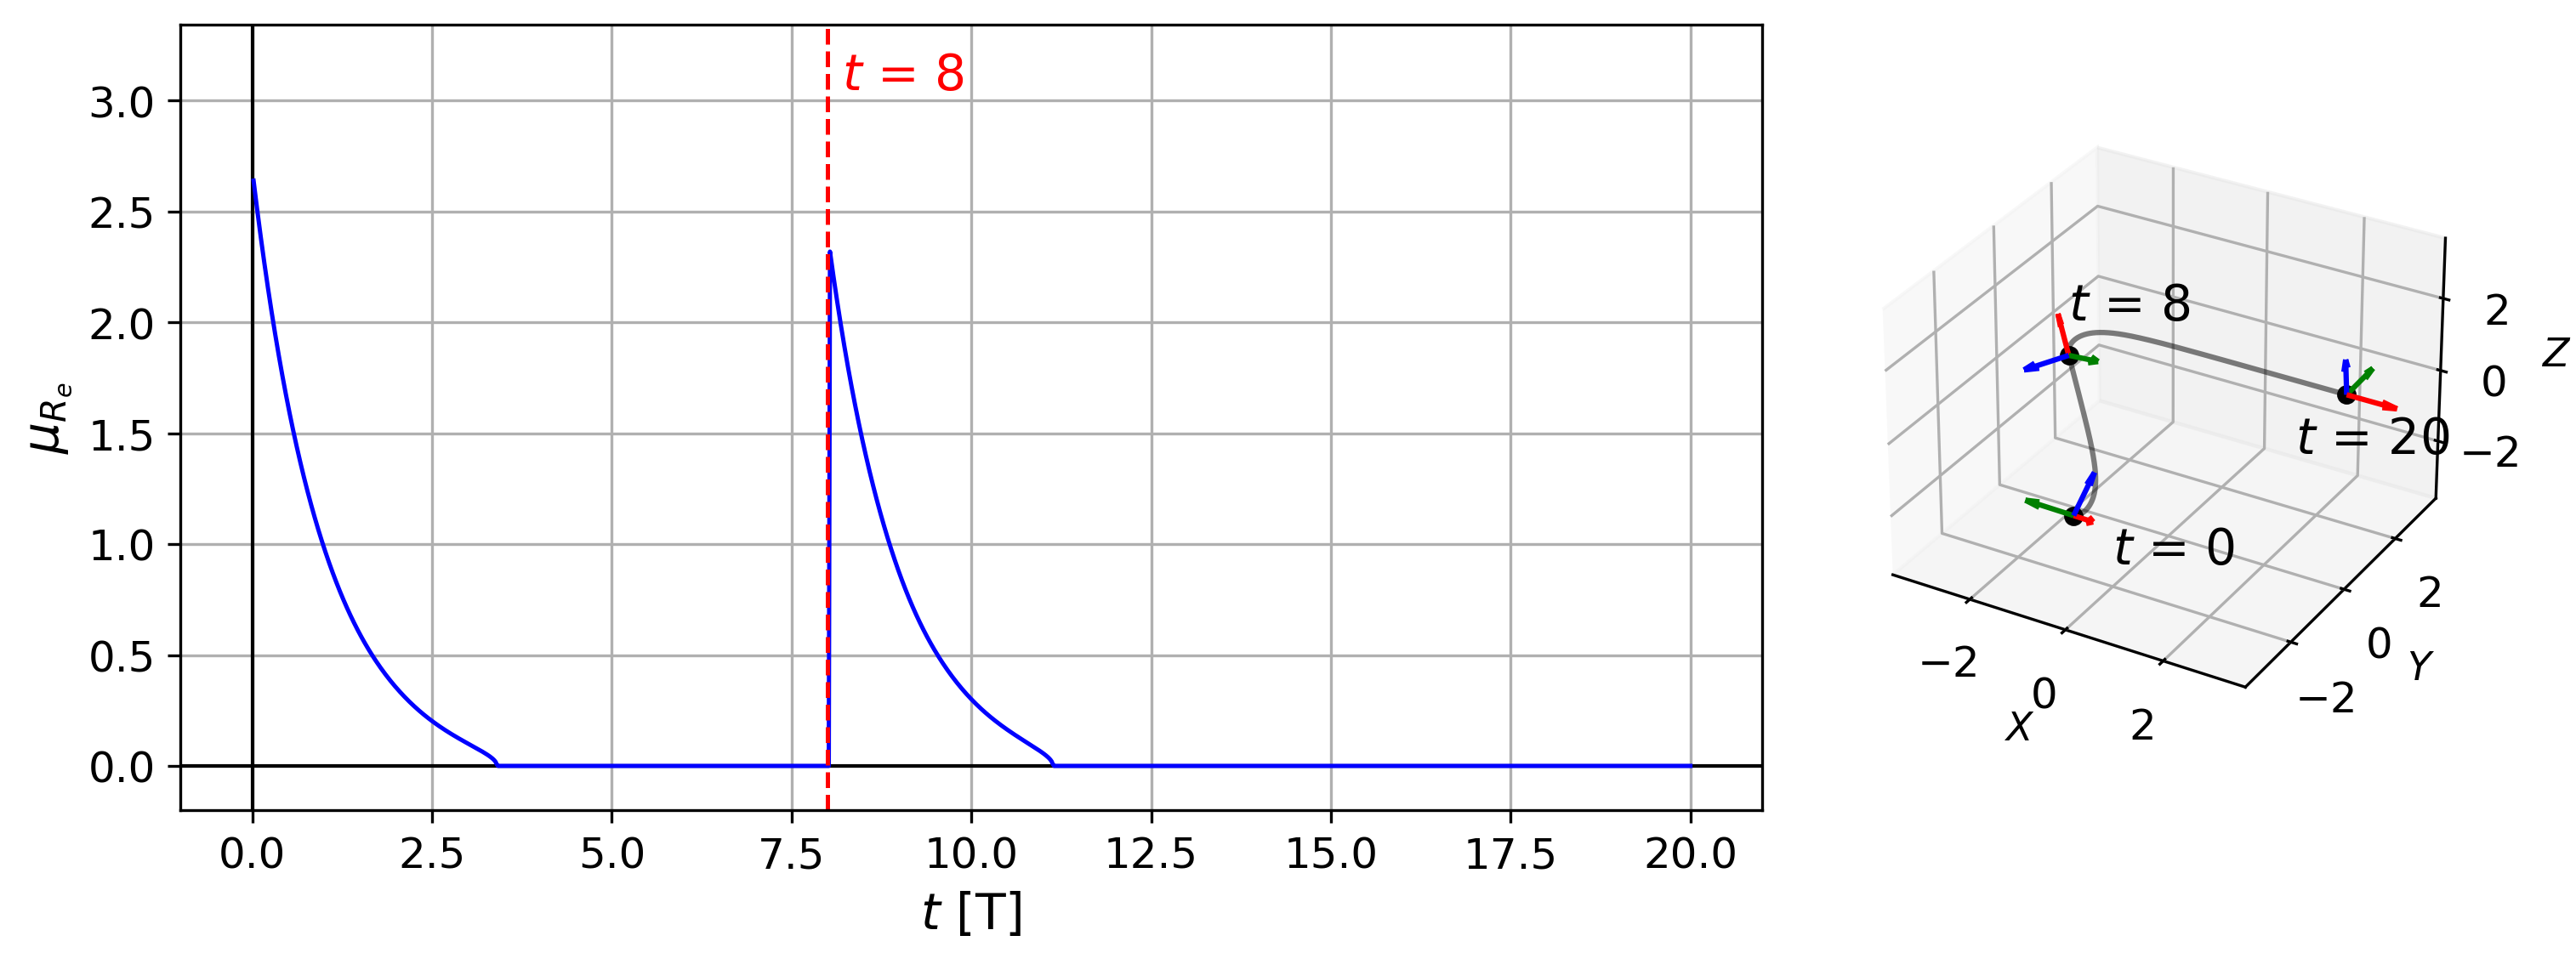

In [3]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_thm1(tf=20, t2=8, wx=1*np.pi, 
                     L1=np.array([[-1,1,1]])/np.sqrt(3), L2=np.array([[1,0,0]])/np.sqrt(1),
                     fb_control=True, sim_kw={"kw":1}, arr_len=1)
sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_article_figure(lims=[-3.5,3.5])

100%|██████████| 501/501 [00:00<00:00, 3296.07it/s]


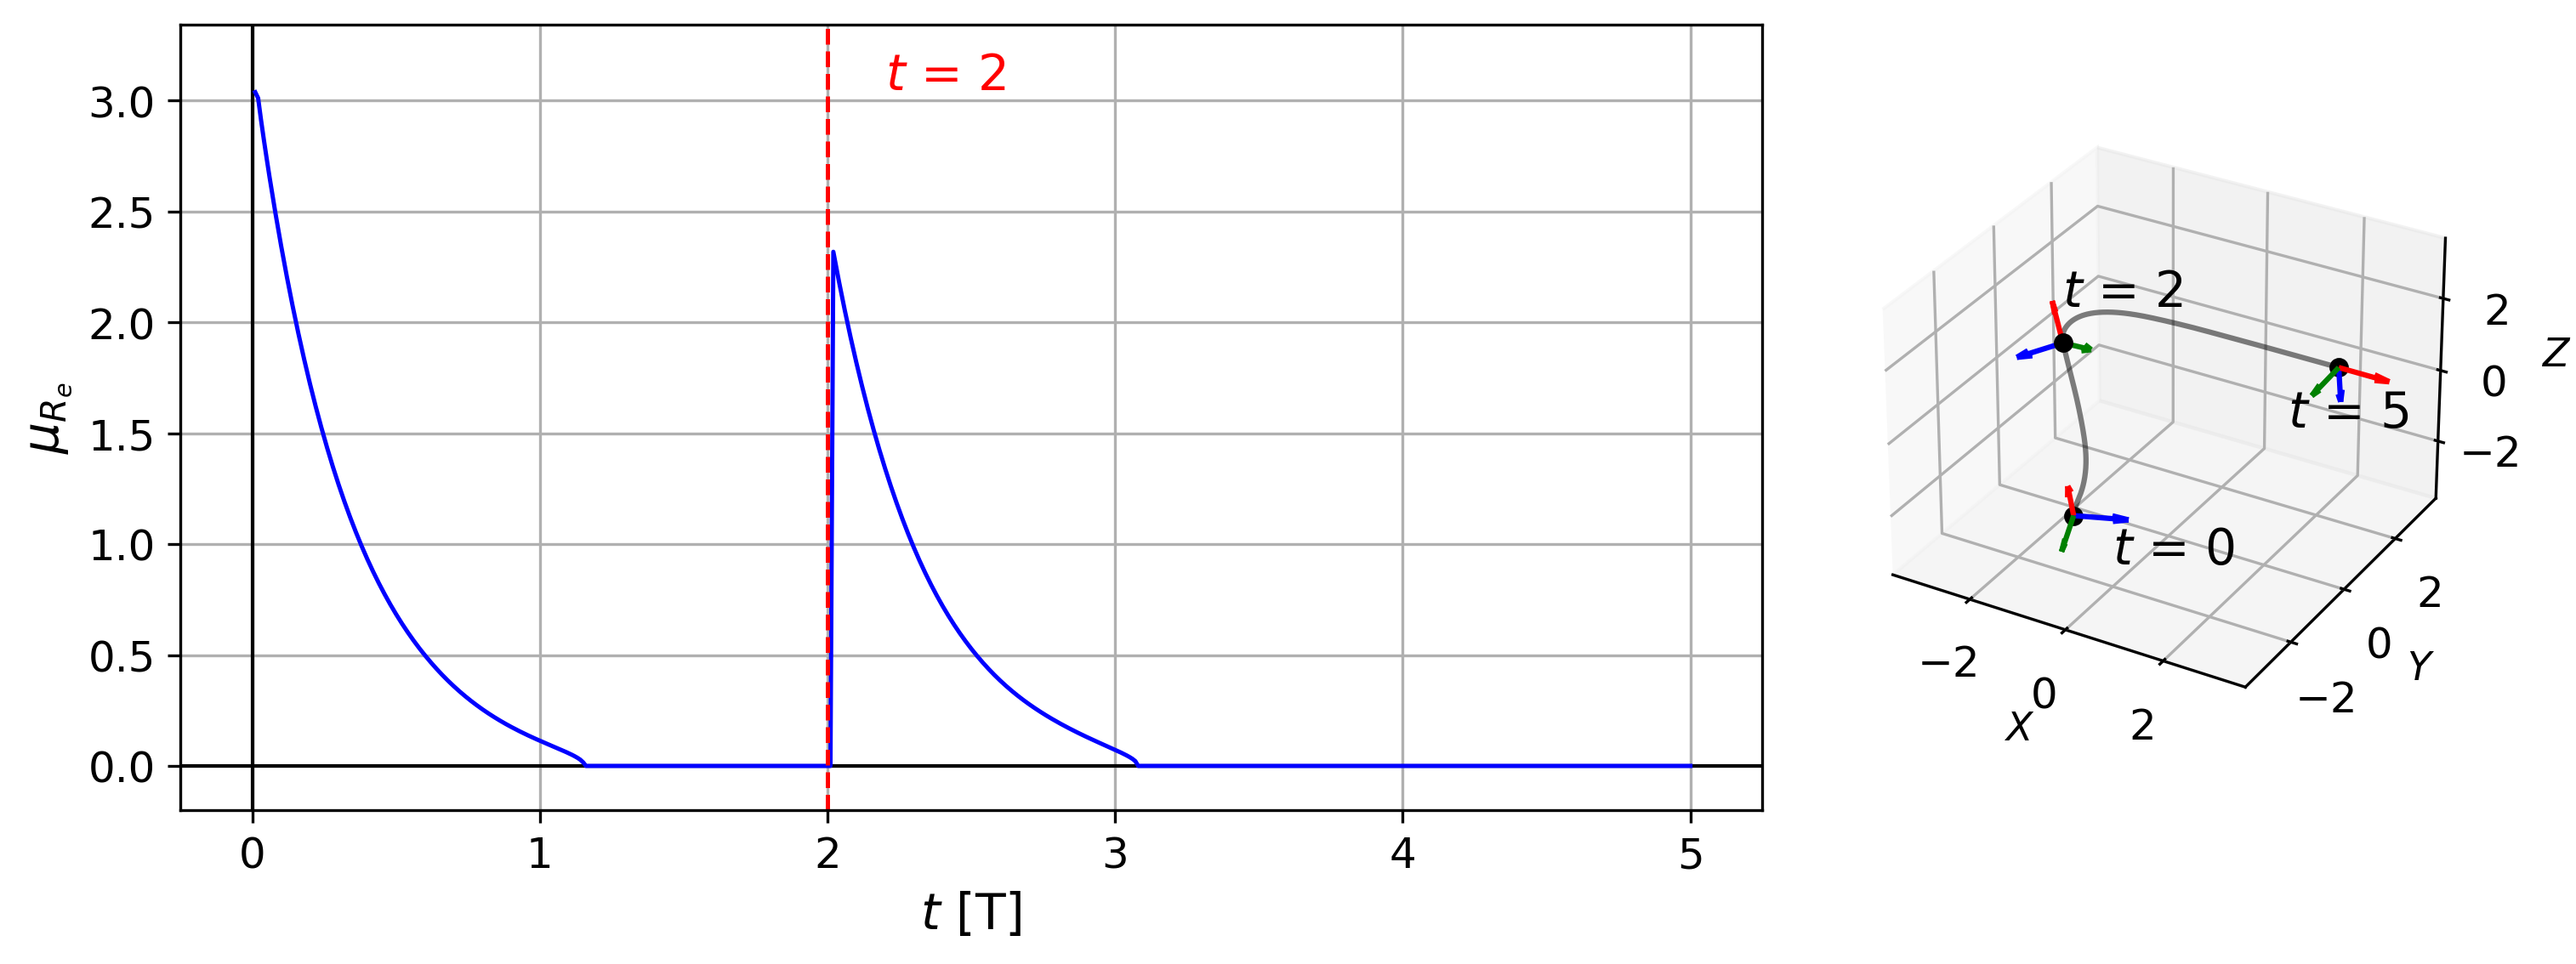

In [8]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_thm1(tf=5, t2=2, wx=3*np.pi, v=2, dt=1/100,
                     L1=np.array([[-1,1,1]])/np.sqrt(3), L2=np.array([[1,0,0]])/np.sqrt(1),
                     fb_control=True, sim_kw={"kw":3}, arr_len=1)
sim_frame.numerical_simulation()

# Generate an animation of the whole simulation
sim_frame.plot_article_figure(OUTPUT_FOLDER,lims=[-3.5,3.5])

100%|██████████| 151/151 [00:00<00:00, 2960.82it/s]


Animation parameters:  {'fps': 30, 'tf': 5, 'frames': 149}


 99%|█████████▊| 147/149 [00:04<00:00, 31.92it/s]

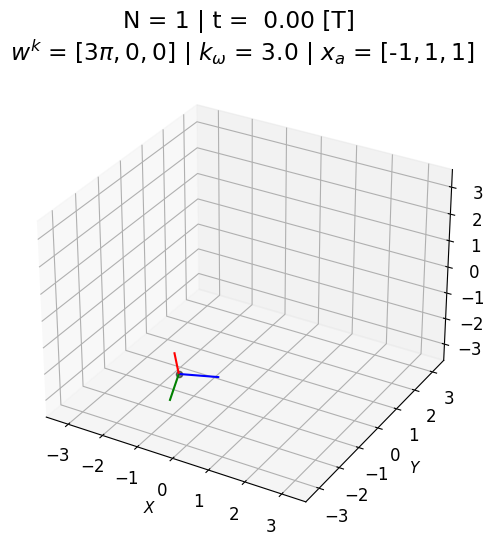

 99%|█████████▊| 147/149 [00:23<00:00, 31.92it/s]

In [9]:
fps = 30

sim_frame.dt = 1/fps
sim_frame.numerical_simulation()
sim_frame.generate_animation(OUTPUT_FOLDER, lims=[-3.5,3.5], gif=True, fps=fps)

## Theorem 2 (tech note) numerical verification

100%|██████████| 1201/1201 [00:00<00:00, 2887.05it/s]


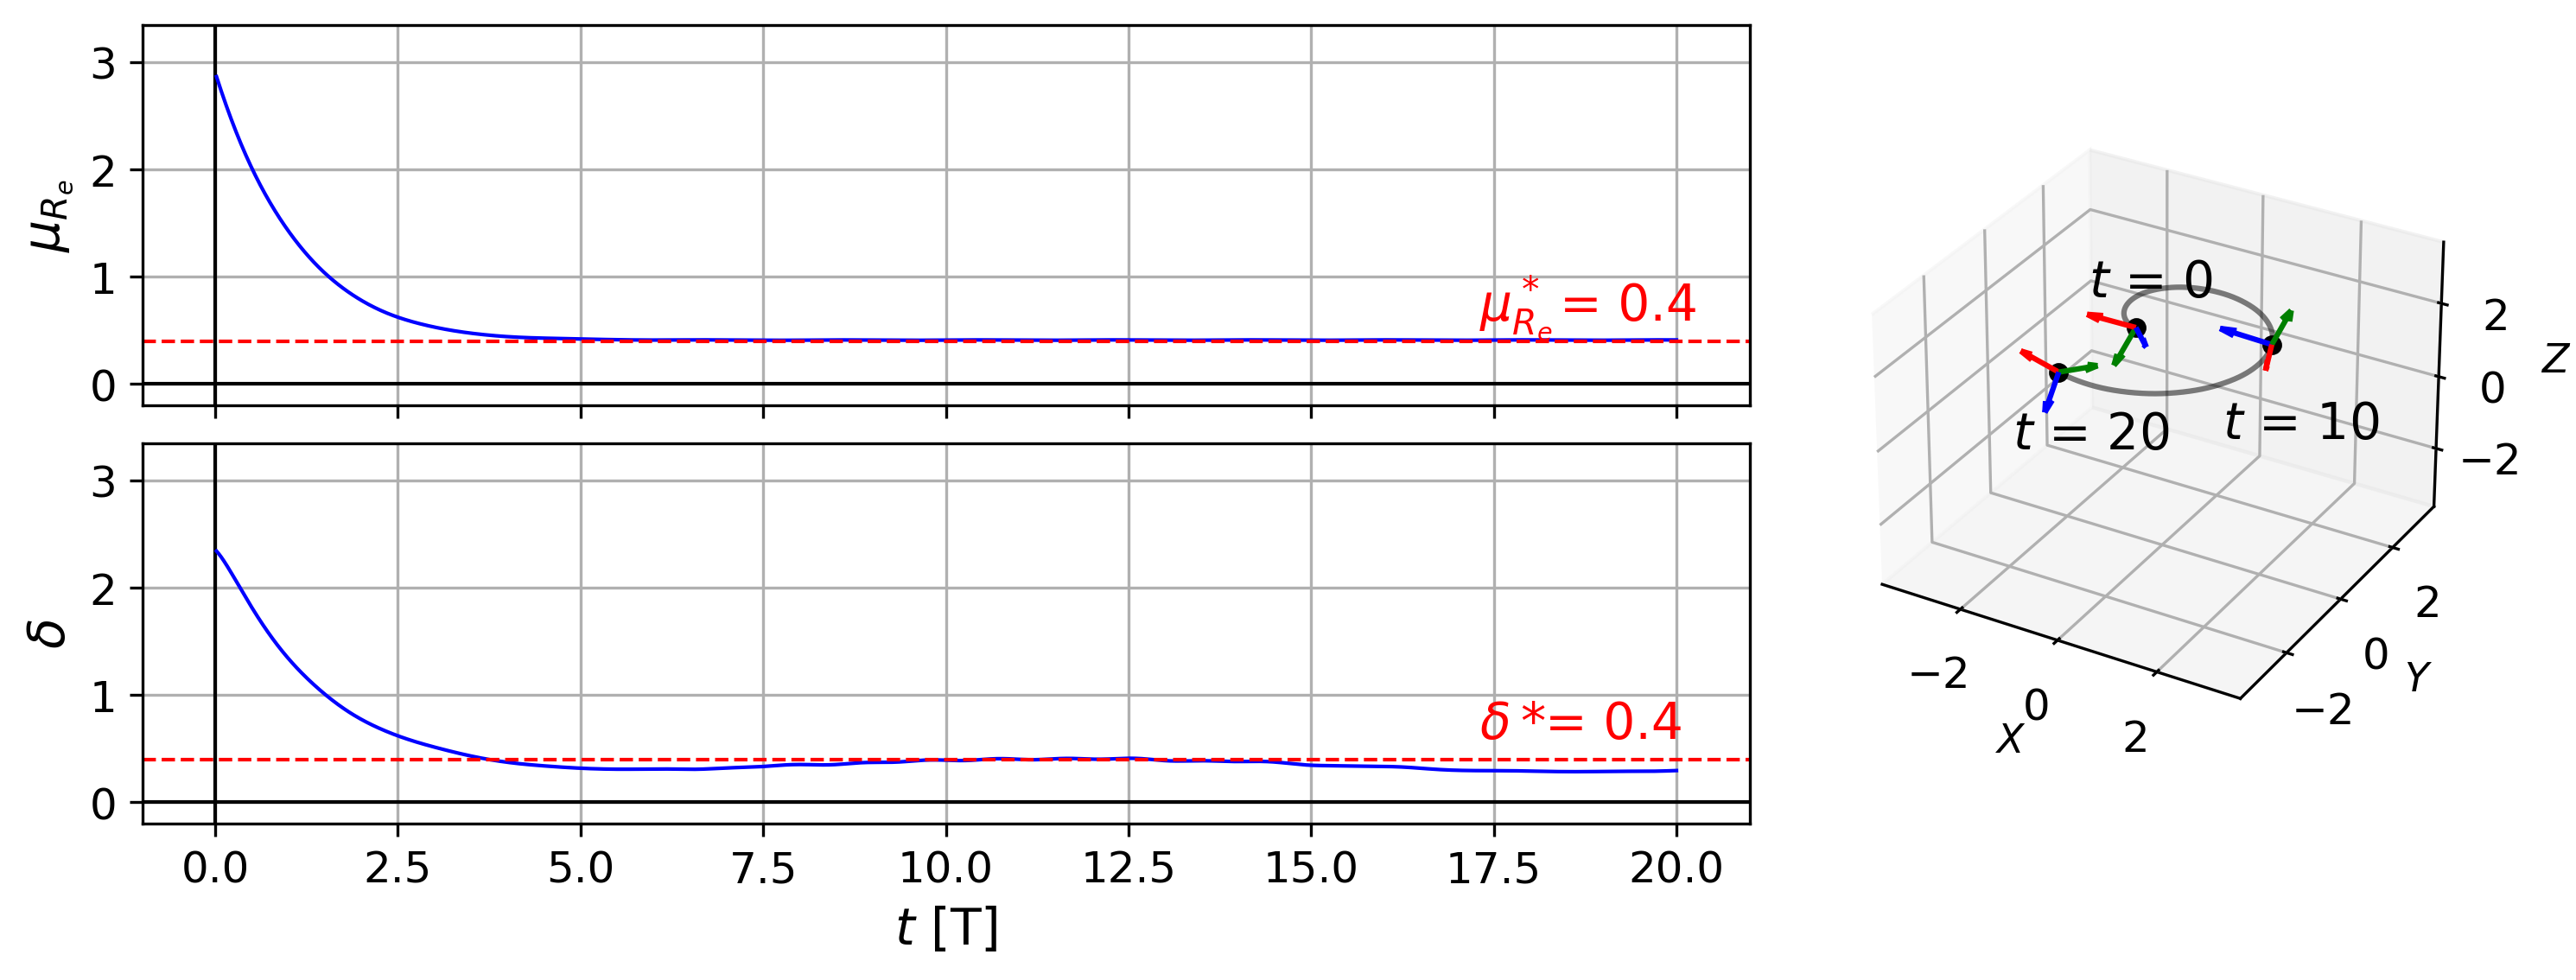

In [2]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_thm2(wx=np.pi, wd=np.pi/14, mu_re_star=0.4, tf=20,
                     L1=np.array([[1,1,0]])/np.sqrt(2), v=0.5,
                     fb_control=True, arr_len=1)

sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_article_figure(lims=[-3.5,3.5])

100%|██████████| 301/301 [00:00<00:00, 3520.49it/s]


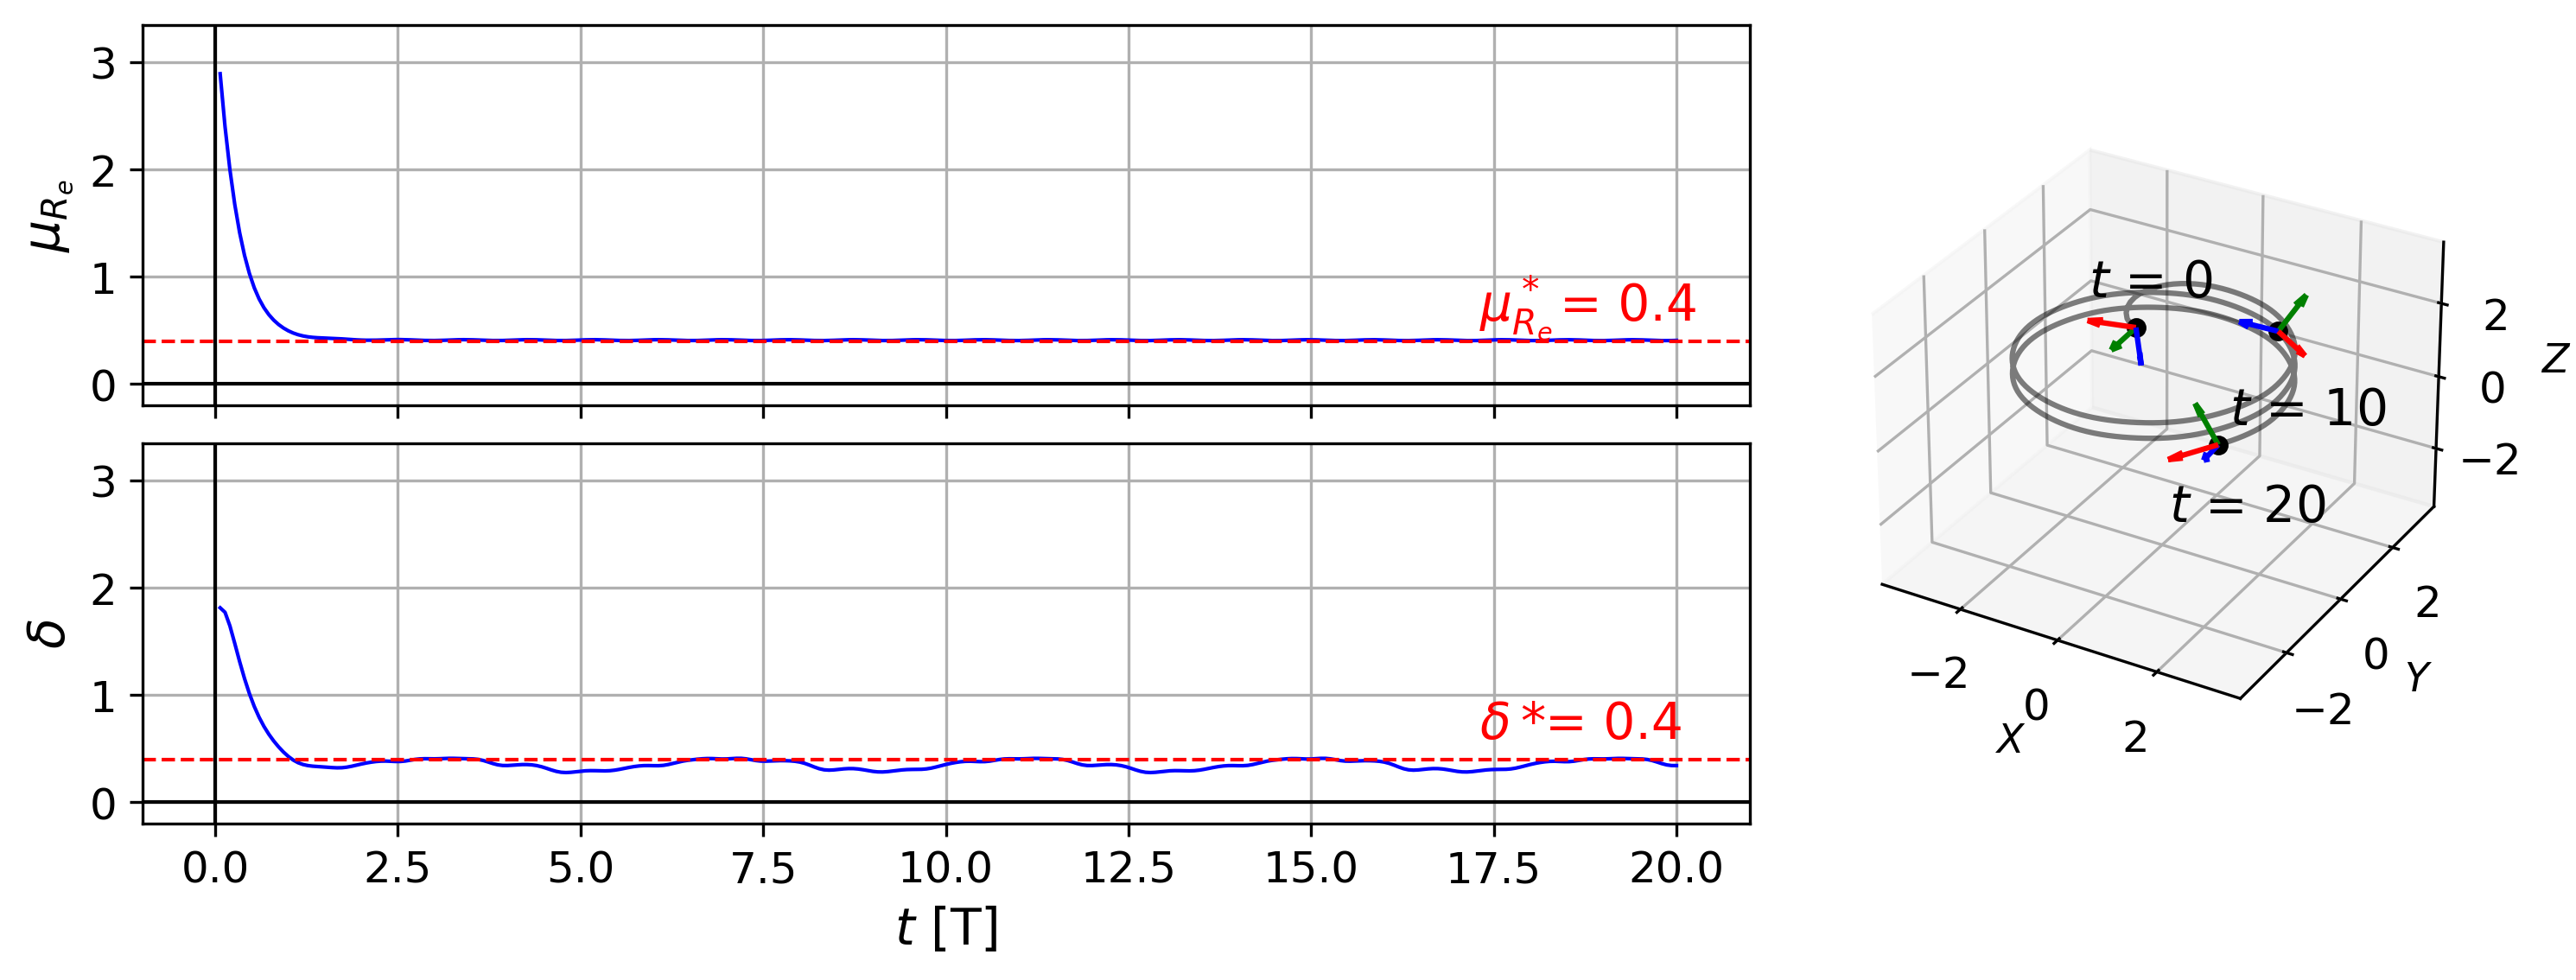

In [3]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_thm2(wx=2*np.pi, wd=np.pi/4, mu_re_star=0.4, tf=20, dt=1/15,
                     L1=np.array([[1,1,0]])/np.sqrt(2), v=2,
                     fb_control=True, arr_len=1)

sim_frame.numerical_simulation()

# Generate an animation of the whole simulation
sim_frame.plot_article_figure(OUTPUT_FOLDER, lims=[-3.5,3.5])

100%|██████████| 301/301 [00:00<00:00, 3151.86it/s]


Animation parameters:  {'fps': 15, 'tf': 20, 'frames': 299}


 99%|█████████▉| 296/299 [00:09<00:00, 31.16it/s]

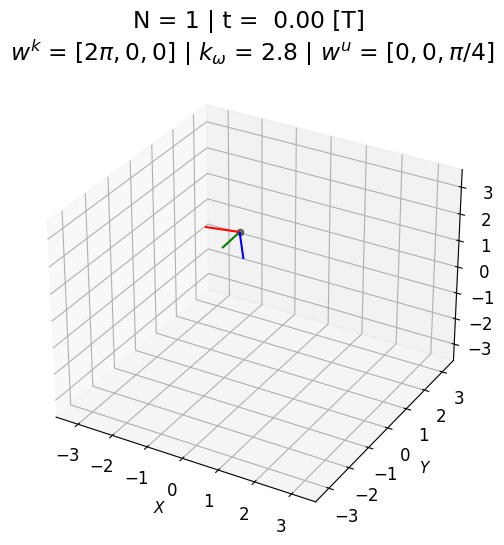

 99%|█████████▉| 296/299 [00:26<00:00, 31.16it/s]

In [4]:
fps = 15

sim_frame.dt = 1/fps
sim_frame.numerical_simulation()
sim_frame.generate_animation(OUTPUT_FOLDER, lims=[-3.5,3.5], gif=True, fps=fps)

## Proposition 2 (tech note) numerical verification

  0%|          | 0/1201 [00:00<?, ?it/s]

 38%|███▊      | 451/1201 [00:00<00:00, 2384.60it/s]

0.005235987755982988 [[ 0.         -0.00523599  0.        ]
 [ 0.00523599  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.010471975511965976 [[ 0.         -0.01047198  0.        ]
 [ 0.01047198  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.015707963267948963 [[ 0.         -0.01570796  0.        ]
 [ 0.01570796  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.020943951023931952 [[ 0.         -0.02094395  0.        ]
 [ 0.02094395  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.02617993877991494 [[ 0.         -0.02617994  0.        ]
 [ 0.02617994  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.03141592653589793 [[ 0.         -0.03141593  0.        ]
 [ 0.03141593  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.036651914291880916 [[ 0.         -0.03665191  0.        ]
 [ 0.03665191  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0

 80%|███████▉  | 957/1201 [00:00<00:00, 2414.78it/s]

2.748893571891067 [[ 0.         -2.74889357  0.        ]
 [ 2.74889357  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
2.7541295596470503 [[ 0.         -2.75412956  0.        ]
 [ 2.75412956  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
2.7593655474030334 [[ 0.         -2.75936555  0.        ]
 [ 2.75936555  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
2.7646015351590165 [[ 0.         -2.76460154  0.        ]
 [ 2.76460154  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
2.7698375229149996 [[ 0.         -2.76983752  0.        ]
 [ 2.76983752  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
2.7750735106709827 [[ 0.         -2.77507351  0.        ]
 [ 2.77507351  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
2.780309498426966 [[ 0.        -2.7803095  0.       ]
 [ 2.7803095  0.         0.       ]
 [ 0.         0.         0.       ]] 
--
2.785545486182949 [[ 0. 

100%|██████████| 1201/1201 [00:00<00:00, 2255.92it/s]


5.288347633542765 [[ 0.         -5.28834763  0.        ]
 [ 5.28834763  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
5.2935836212987475 [[ 0.         -5.29358362  0.        ]
 [ 5.29358362  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
5.29881960905473 [[ 0.         -5.29881961  0.        ]
 [ 5.29881961  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
5.304055596810713 [[ 0.        -5.3040556  0.       ]
 [ 5.3040556  0.         0.       ]
 [ 0.         0.         0.       ]] 
--
5.3092915845666955 [[ 0.         -5.30929158  0.        ]
 [ 5.30929158  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
5.314527572322678 [[ 0.         -5.31452757  0.        ]
 [ 5.31452757  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
5.319763560078661 [[ 0.         -5.31976356  0.        ]
 [ 5.31976356  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
5.3249995478346435 [[ 0.    

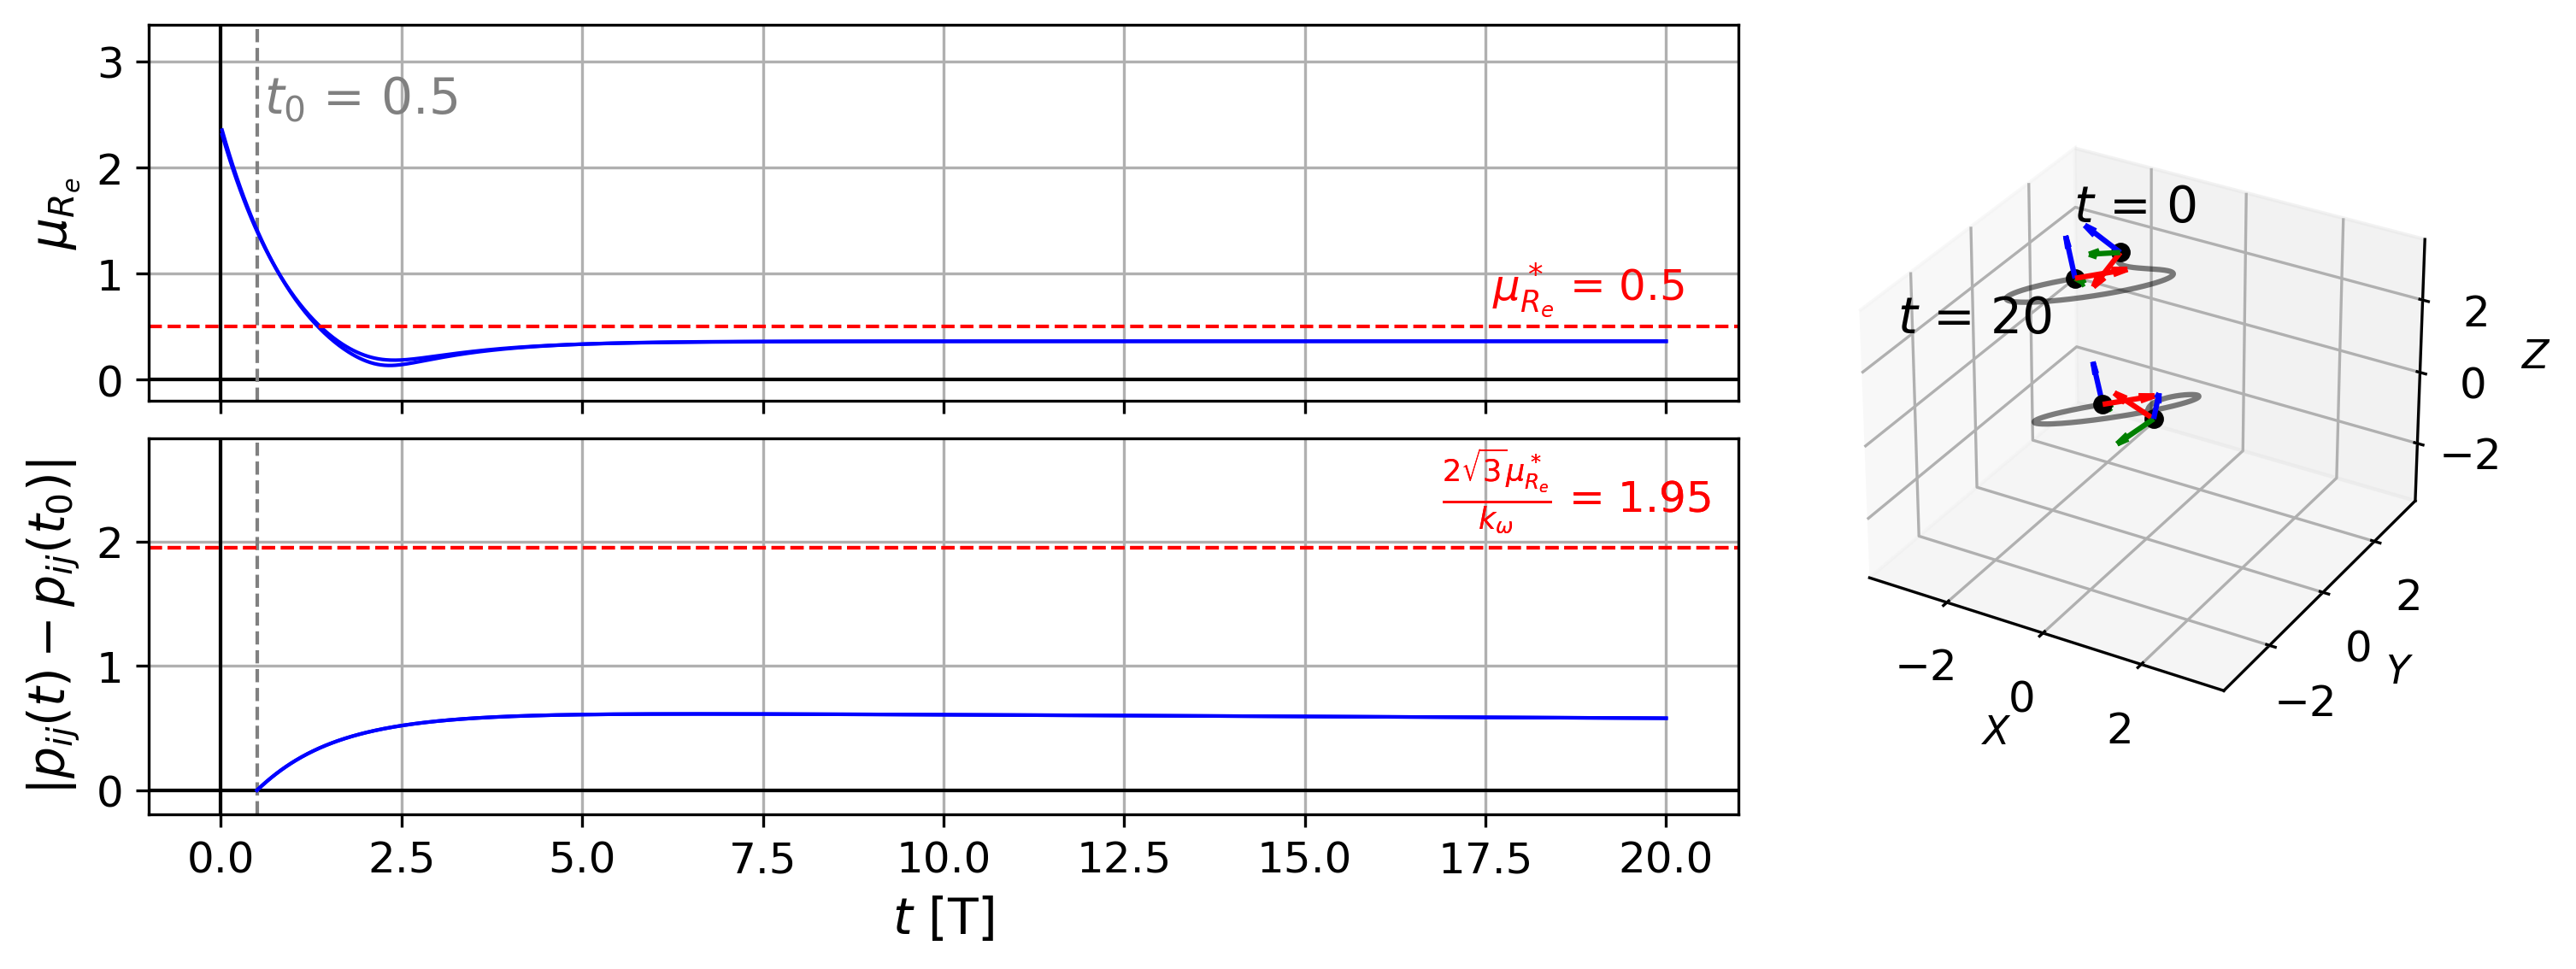

In [3]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_prop2(tf=20, wx=0, wd=np.pi/10, mu_re_star=0.5, 
                     L1=np.array([1,1,0])/np.sqrt(2), v=0.5,
                     fb_control=True, arr_len=1)

sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_article_figure(OUTPUT_FOLDER, t0=0.5)

 21%|██        | 255/1201 [00:00<00:00, 2543.45it/s]

0.01308996938995747 [[ 0.         -0.01308997  0.        ]
 [ 0.01308997  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.02617993877991494 [[ 0.         -0.02617994  0.        ]
 [ 0.02617994  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.039269908169872414 [[ 0.         -0.03926991  0.        ]
 [ 0.03926991  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.05235987755982988 [[ 0.         -0.05235988  0.        ]
 [ 0.05235988  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.06544984694978735 [[ 0.         -0.06544985  0.        ]
 [ 0.06544985  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.07853981633974483 [[ 0.         -0.07853982  0.        ]
 [ 0.07853982  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.0916297857297023 [[ 0.         -0.09162979  0.        ]
 [ 0.09162979  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.1047

 85%|████████▌ | 1024/1201 [00:00<00:00, 2505.09it/s]

0.40578905108871016 [[ 0.         -0.40578905  0.        ]
 [ 0.40578905  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.41887902047866765 [[ 0.         -0.41887902  0.        ]
 [ 0.41887902  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.43196898986862514 [[ 0.         -0.43196899  0.        ]
 [ 0.43196899  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.44505895925858263 [[ 0.         -0.44505896  0.        ]
 [ 0.44505896  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.4581489286485401 [[ 0.         -0.45814893  0.        ]
 [ 0.45814893  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.4712388980384976 [[ 0.        -0.4712389  0.       ]
 [ 0.4712389  0.         0.       ]
 [ 0.         0.         0.       ]] 
--
0.4843288674284551 [[ 0.         -0.48432887  0.        ]
 [ 0.48432887  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.4974188368184126

100%|██████████| 1201/1201 [00:00<00:00, 2412.07it/s]


0.9686577348569086 [[ 0.         -0.96865773  0.        ]
 [ 0.96865773  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.9817477042468661 [[ 0.        -0.9817477  0.       ]
 [ 0.9817477  0.         0.       ]
 [ 0.         0.         0.       ]] 
--
0.9948376736368235 [[ 0.         -0.99483767  0.        ]
 [ 0.99483767  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
1.007927643026781 [[ 0.         -1.00792764  0.        ]
 [ 1.00792764  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
1.0210176124167385 [[ 0.         -1.02101761  0.        ]
 [ 1.02101761  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
1.034107581806696 [[ 0.         -1.03410758  0.        ]
 [ 1.03410758  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
1.0471975511966536 [[ 0.         -1.04719755  0.        ]
 [ 1.04719755  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
1.0602875205866111 [[ 0.

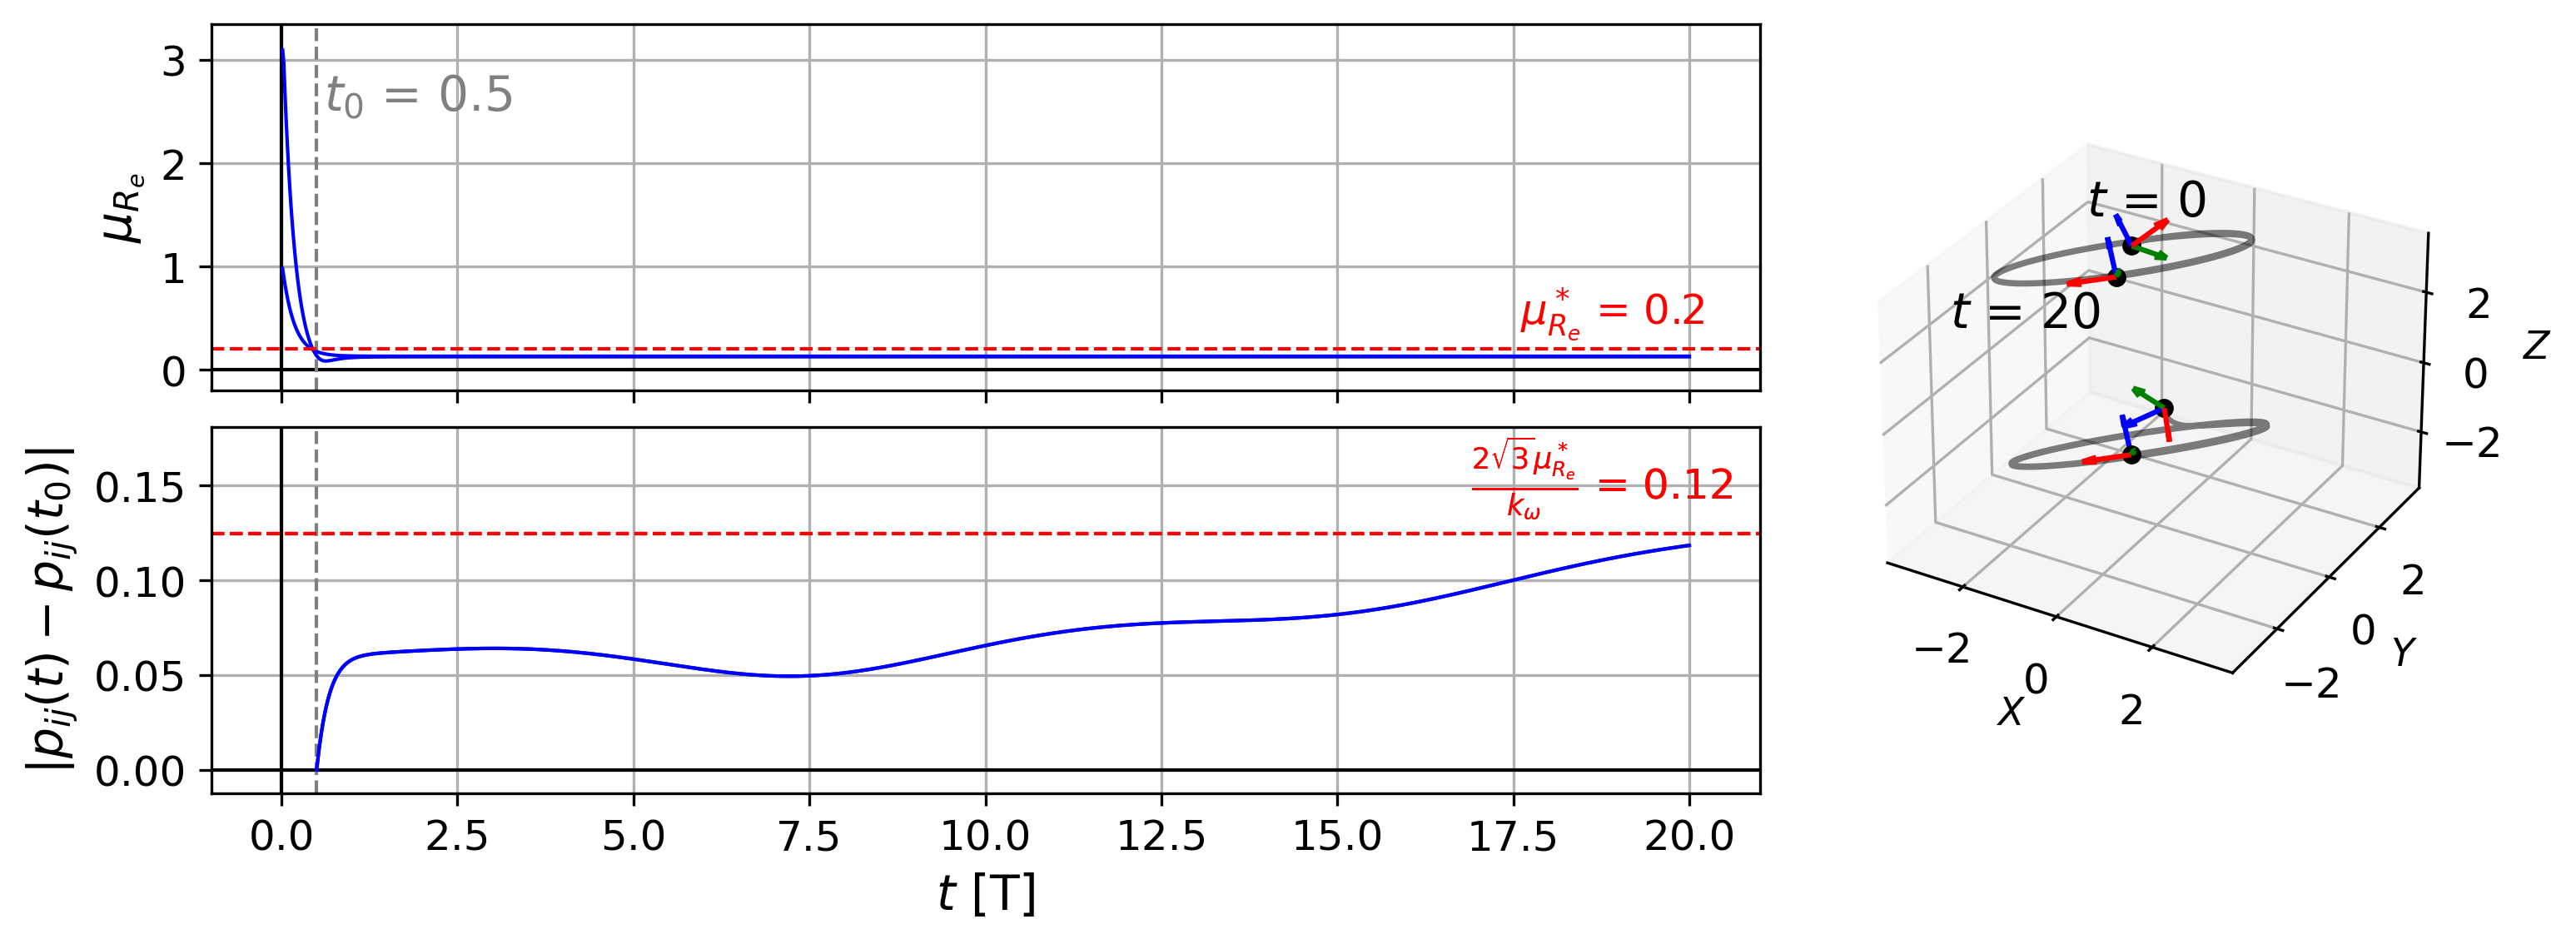

In [4]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_prop2(wx=np.pi, wd=np.pi/4, mu_re_star=0.2, tf=20, dt=1/60,
                     L1=np.array([1,1,0])/np.sqrt(2), v=2,
                     fb_control=True, arr_len=1)

sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_article_figure(t0=0.5)

100%|██████████| 301/301 [00:00<00:00, 1544.30it/s]


0.05235987755982988 [[ 0.         -0.05235988  0.        ]
 [ 0.05235988  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.10471975511965977 [[ 0.         -0.10471976  0.        ]
 [ 0.10471976  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.15707963267948966 [[ 0.         -0.15707963  0.        ]
 [ 0.15707963  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.20943951023931953 [[ 0.         -0.20943951  0.        ]
 [ 0.20943951  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.2617993877991494 [[ 0.         -0.26179939  0.        ]
 [ 0.26179939  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.3141592653589793 [[ 0.         -0.31415927  0.        ]
 [ 0.31415927  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.3665191429188092 [[ 0.         -0.36651914  0.        ]
 [ 0.36651914  0.          0.        ]
 [ 0.          0.          0.        ]] 
--
0.4188790

100%|██████████| 299/299 [00:12<00:00, 19.67it/s]

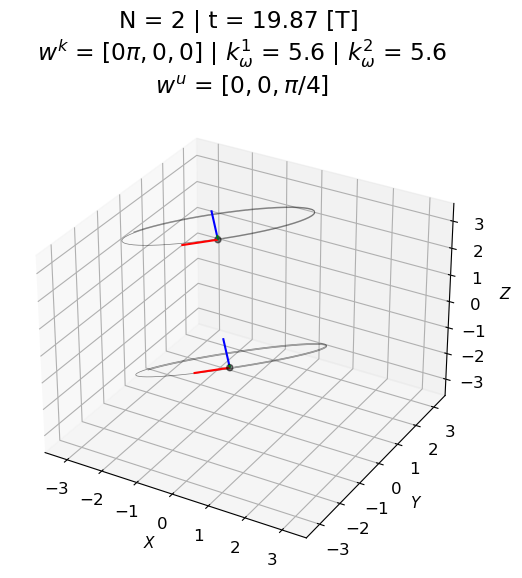

100%|██████████| 299/299 [00:23<00:00, 19.67it/s]

In [6]:
fps = 15

sim_frame.dt = 1/fps
sim_frame.numerical_simulation()
sim_frame.generate_animation(OUTPUT_FOLDER, gif=True, fps=fps)

## Plotting trajectories in $\mathrm{SO}(3)$

In [ ]:
# Initialise the simulation frame and launch the numerical simulation
L1 = np.array([[1,0,0]])
sim_frame = sim_thm2(n_agents=10, tf=12, wx=np.pi/2, L1=L1/np.linalg.norm(L1), t2=40,
                      v_rotation=False, fb_control=True, sim_kw={"kw":4}, arr_len=1)
sim_frame.numerical_simulation()

# Extract the desired data (R matrices)
data_R = sim_frame.data["R"]
print(data_R.shape)

In [ ]:
fig  = plt.figure(figsize=(12,12))
grid = plt.GridSpec(1, 2, hspace=0, wspace=0.2)

ax1 = fig.add_subplot(grid[:, 0], projection='3d')
ax2 = fig.add_subplot(grid[:, 1], projection='3d')

# Plotting the SO(3) trajectory
plot_so3_traj(data_R, ax=ax1, lim=5)

# Plotting the 3D heading trajectory
plot_heading_traj(data_R, ax=ax2, lim=1.6)

## Source seeking in 3D (WIP)

In [ ]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_ss_test(n_agents=10, tf=25, wx=2*np.pi, sim_kw={"kw":0.9})
sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_summary(dpi=200)

In [ ]:
# Generate an animation of the whole simulation
sim_frame.generate_animation(OUTPUT_FOLDER, res_label="HD")